# **The mission statement**

Bellabeat, a high-tech company that manufactures health-focused smart products wants to analyse the usage of one of their products in order to gain insight into how people are already using their smart devices.Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

# PHASE 1 : ASK¶

**Key objectives:**

1.Identify the business task:

The company better target their marketing efforts into their customer's needs based on their usage of their fitness smart devices. With this info then make high-level recommendations for how these trends can inform Bellabeat marketing strategy.

2.Consider key stakeholders:

The main stakeholders here are Urška Sršen, Bellabeat’s co-founder and Chief Creative Officer; Sando Mur, Mathematician and Bellabeat’s cofounder; And the rest of the Bellabeat marketing analytics team.

3.The business task:

Given these facts, the business task is defined as searching for user patterns of usage of their smart devices in order to gain insights that would later better orientate marketing decisions. So, in one phrase it would be:

**How do our users use our smart devices?**

**PHASE 2 : Prepare**

Key objectives:

1.Determine the credibility of the data:

The data is public data from FitBit Fitness Tracker Data. It's a dataset from thirty fitbit users that includes minute-level output for physical activity, heart rate, and sleep monitoring. It's a good database segmented in several tables with different aspects of the data of the device with lots of details about the user behaviour.

2.Sort and filter the data:

For this analysis I'm going to focus on the daily timeframe as my analysis is focused on detecting high-level trends in usage, not in the detailed performance of the users. For that the most interesting data for me is all the daily activity and the sleep data as they will probably show some interesting patterns but I'll have to merge some tables together to do my analysis.

In [1]:
#Importing libraries
library(tidyverse) 
library(reshape2)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
#Importing the data
dailyActivity_merged <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyCalories_merged <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensities_merged <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailySteps_merged <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleepDay_merged <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo_merged <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [3]:
#Here I join all the daily tables data and the sleep data. They share the Id and date columns so it easy to simply merge them by Id and then leave only one date column.
merge_1 <- merge(dailyActivity_merged, dailyCalories_merged, by = c("Id","Calories"))
merge_2 <- merge(dailyIntensities_merged, dailyIntensities_merged, by = c("Id","ActivityDay","SedentaryMinutes", "LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes", "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance"))

merge_daily <- merge(merge_1, merge_2, by = c("Id","ActivityDay","SedentaryMinutes", "LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes", "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance")) %>%
select(-ActivityDay) %>% rename(Date = ActivityDate)

daily_data <- merge(merge_daily, sleepDay_merged, by = "Id",all=TRUE) %>% drop_na() %>% select(-SleepDay, -TrackerDistance)

options(repr.plot.width=30)


In [4]:
#Lets take a peak into the data now:
summary(daily_data)

       Id            SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes
 Min.   :1.504e+09   Min.   :   0.0   Min.   :  0.0        Min.   :  0.00     
 1st Qu.:4.020e+09   1st Qu.: 687.0   1st Qu.:  0.0        1st Qu.:  0.00     
 Median :4.703e+09   Median : 781.0   Median :171.0        Median :  3.00     
 Mean   :5.117e+09   Mean   : 938.6   Mean   :156.4        Mean   : 13.58     
 3rd Qu.:6.962e+09   3rd Qu.:1440.0   3rd Qu.:240.0        3rd Qu.: 19.00     
 Max.   :8.792e+09   Max.   :1440.0   Max.   :518.0        Max.   :143.00     
 VeryActiveMinutes SedentaryActiveDistance LightActiveDistance
 Min.   :  0.00    Min.   :0.0000000       Min.   : 0.000     
 1st Qu.:  0.00    1st Qu.:0.0000000       1st Qu.: 0.000     
 Median :  0.00    Median :0.0000000       Median : 2.860     
 Mean   : 18.76    Mean   :0.0005276       Mean   : 2.771     
 3rd Qu.: 28.00    3rd Qu.:0.0000000       3rd Qu.: 4.480     
 Max.   :210.00    Max.   :0.1100000       Max.   :10.300     
 Moder

* Here I can see very easily the segments for every variable, and that will help me a lot making categories for some of the data to better understand and visualize this data.

# ** PHASE 3 & 4: Process and Analyse¶**
**Key objectives:**

1.Clean the data, and prepare the data for analysis:

With all the daily data in one place I can now focus on some aspects that interest me to see if there are any trends for me to identify. I think that watching the calories burn by activity type and user and seeing the relation of the activity and the sleep quality will be the focus of my analysis. For that I will create some new summarized tables where I will classify some of the aspects of the data into more easily interpretable categories for the analysis.

In [6]:
#In order to better visualize the data I will group the user into four categories based on for which of their activity types they have more minutes, this will be very useful to quickly see patterns and visualize them:
data_by_usertype <- daily_data %>%
reframe(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")), Calories, .group=Id) %>%
drop_na()

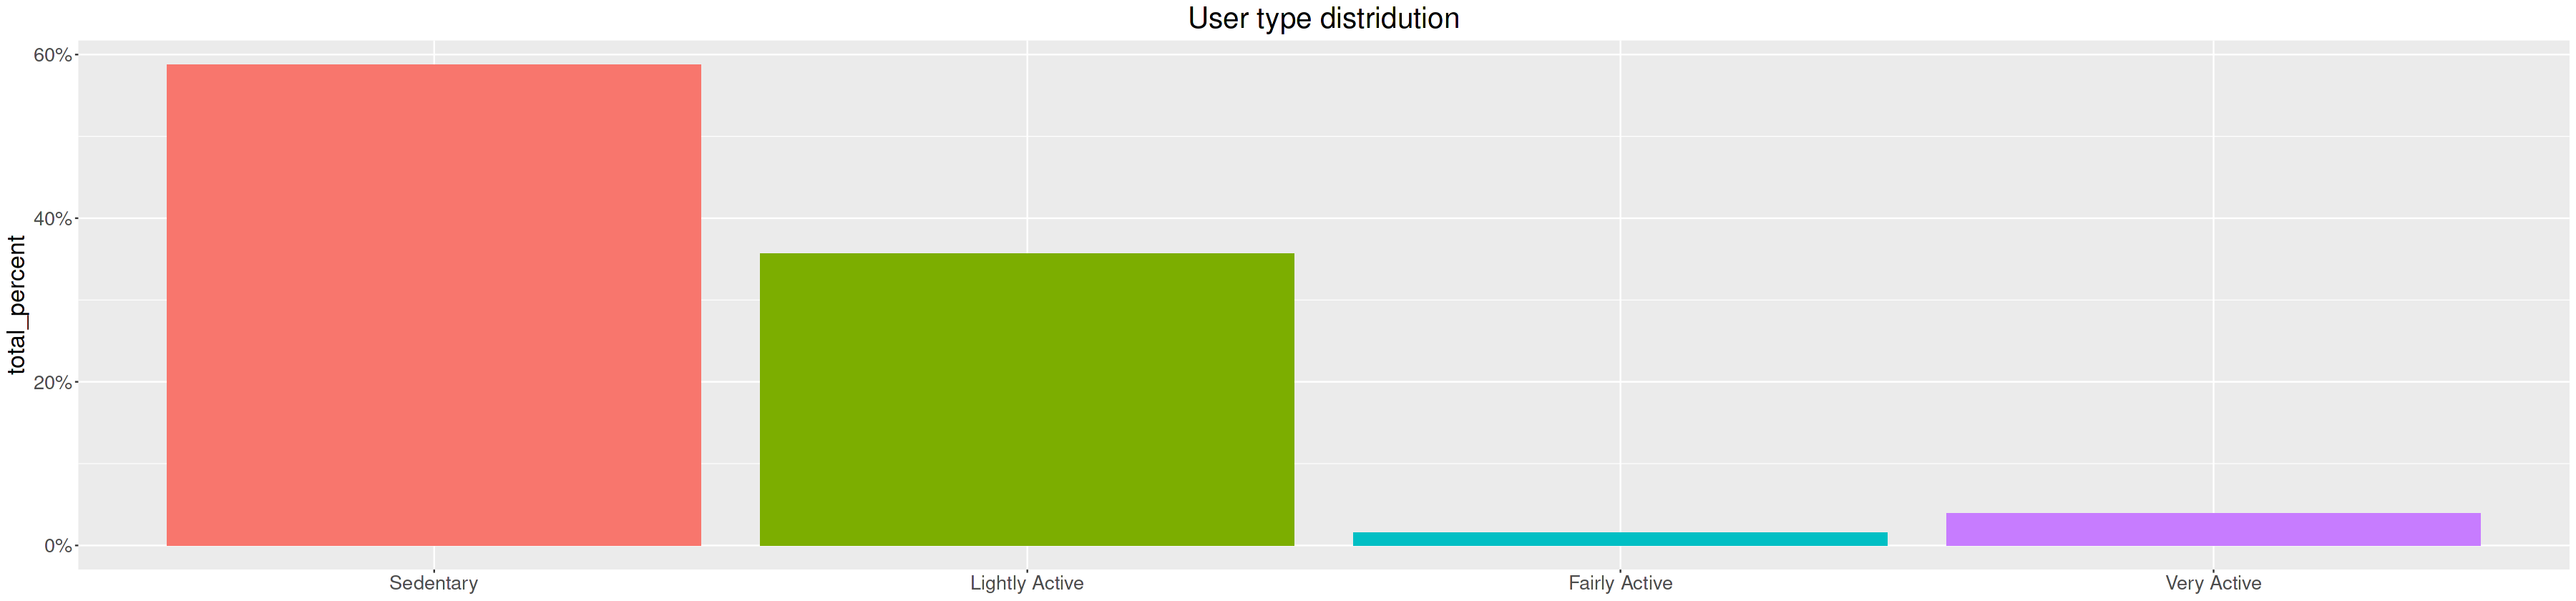

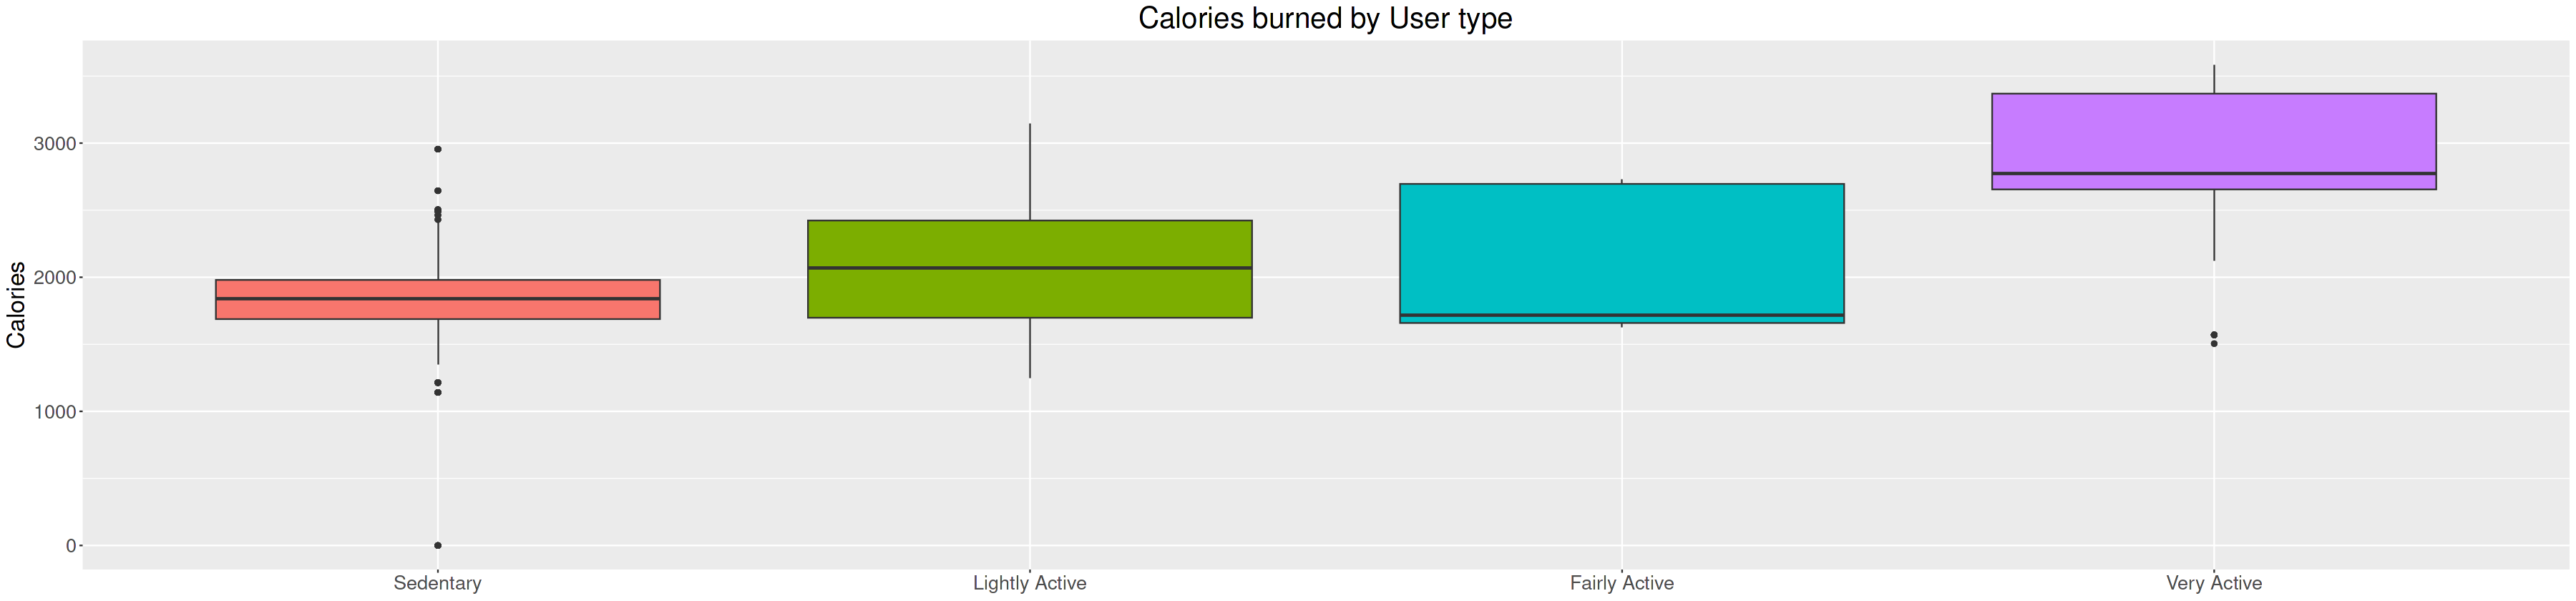

In [7]:
#With this new table I can now visualize both the user type distribution and the calories burned for every user type:
data_by_usertype %>%
group_by(user_type) %>%
summarise(total = n()) %>%
mutate(totals = sum(total)) %>%
group_by(user_type) %>%
summarise(total_percent = total / totals) %>%
ggplot(aes(user_type,y=total_percent, fill=user_type)) +
    geom_col()+
    scale_y_continuous(labels = scales::percent) +
    theme(legend.position="none") +
    labs(title="User type distridution", x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

ggplot(data_by_usertype, aes(user_type, Calories, fill=user_type)) +
    geom_boxplot() +
    theme(legend.position="none") +
    labs(title="Calories burned by User type", x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))


**Analysis:¶**

* It seems that the better part of the users are mostly sedentary or Lightly active users but it's very interesting to see that even though they are the biggest category the Fairly active and most importantly, the Very active are the ones with more calories burned. That is not necessarily surprising but it confirms the suspicion that the level of activity relates with the calories burned and so it's an important factor in any effort to lose weight.

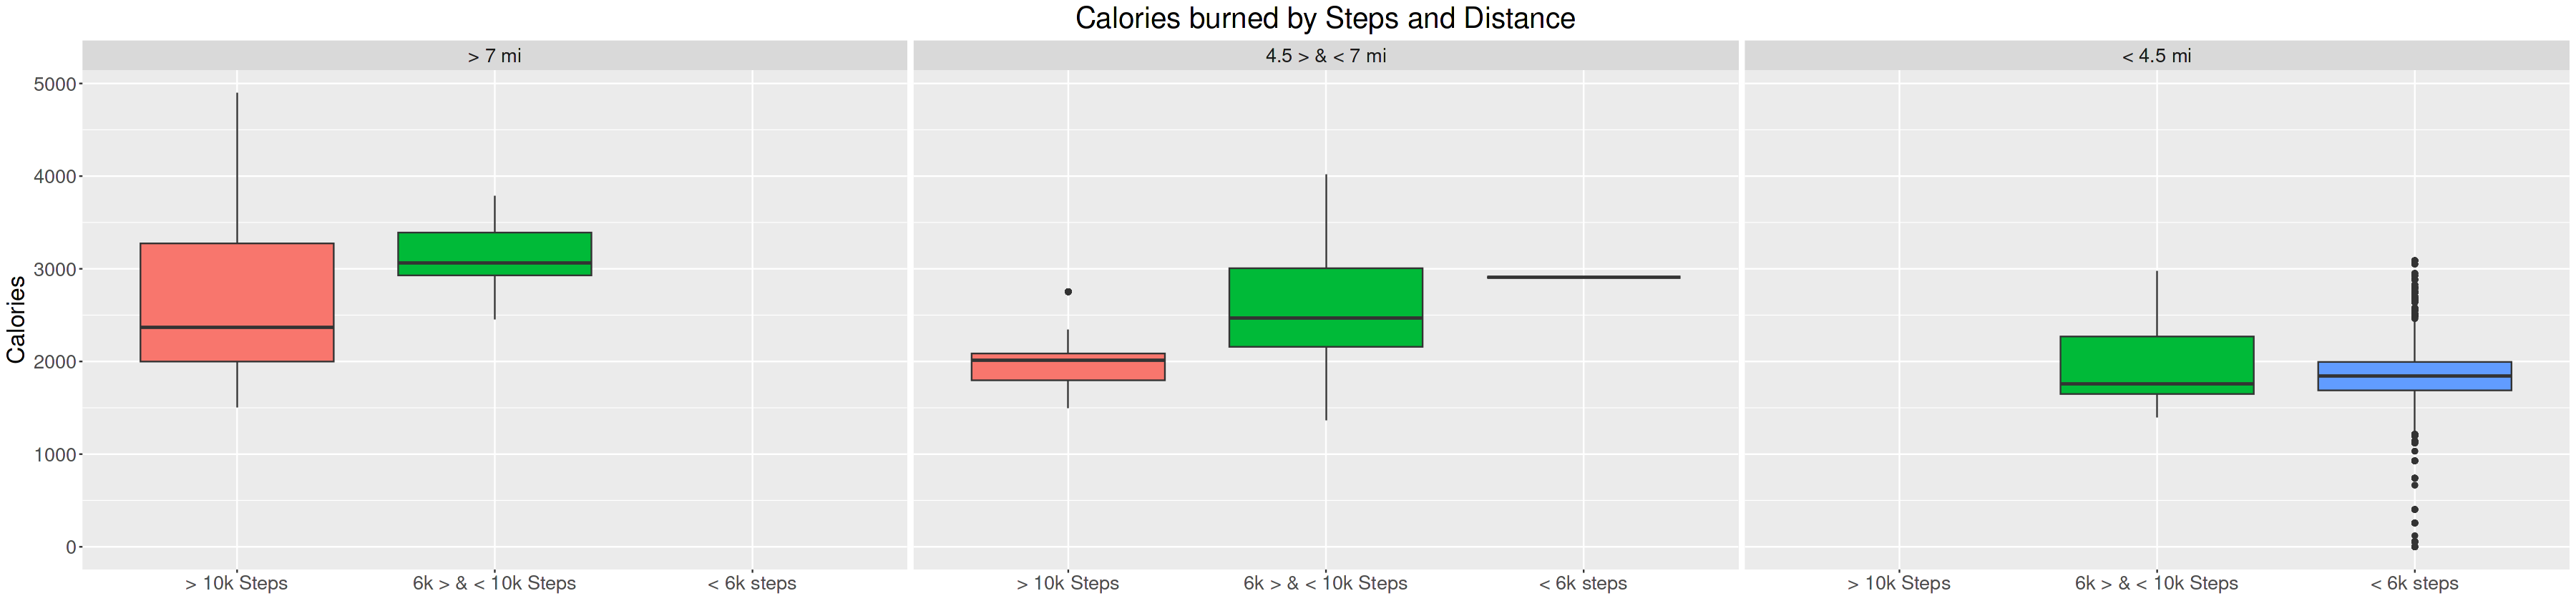

In [9]:
#I think it will also be interesting to check the relation between Distance/Steps and Calories burned so I plot them:
daily_data %>%
reframe(
distance = factor(case_when(
    TotalDistance < 4.5 ~ "< 4.5 mi",
    TotalDistance >= 4.5 & TotalDistance <= 7 ~ "4.5 > & < 7 mi",
    TotalDistance > 7 ~ "> 7 mi",
),levels = c("> 7 mi","4.5 > & < 7 mi","< 4.5 mi")),
steps = factor(case_when(
    TotalSteps < 6000 ~ "< 6k steps",
    TotalSteps >= 6000 & TotalSteps <= 10000 ~ "6k > & < 10k Steps",
    TotalSteps > 10000 ~ "> 10k Steps",
),levels = c("> 10k Steps","6k > & < 10k Steps","< 6k steps")),
Calories) %>%
ggplot(aes(steps,Calories,fill=steps)) +
    geom_boxplot() +
    facet_wrap(~distance)+
    labs(title="Calories burned by Steps and Distance",x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

**Analysis:¶**
* This boxplot represents the calories burned by the three categories of steps based on the summary values and then its faceted by the three categories of distance traveled. I did this to see which aspect is more important to the calories burned, the steps or the distance traveled and here we can see interestingly that the most calories burned are the "6k > & < 10k Steps" and "> 7 miles" which would indicate some kind of running activity that allows the user to traverse more distance with less steps.

* Also interesting is the parallelism between the "> 10k Steps" in the mean distance category and the "<6k Steps" in the low distance category that reinforces the idea that speed is the most important factor in calories burned.

In [13]:
#Now let's focus on the sleep quality, for that I will now make categories for the sleeping time and I will make a new table with the sleeping categories percent for each individual user type:
sleepType_by_userType <- daily_data %>%
group_by(Id) %>%
reframe(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")),
sleep_type = factor(case_when(
    mean(TotalMinutesAsleep) < 360 ~ "Bad Sleep",
    mean(TotalMinutesAsleep) > 360 & mean(TotalMinutesAsleep) <= 480 ~ "Normal Sleep",
    mean(TotalMinutesAsleep) > 480 ~ "Over Sleep",
),levels=c("Bad Sleep", "Normal Sleep", "Over Sleep")), total_sleep = sum(TotalMinutesAsleep) ,.groups="drop"
) %>%
drop_na() %>%
group_by(user_type) %>%
summarise(bad_sleepers = sum(sleep_type == "Bad Sleep"), normal_sleepers = sum(sleep_type == "Normal Sleep"),over_sleepers = sum(sleep_type == "Over Sleep"),total=n(),.groups="drop") %>%
group_by(user_type) %>%
reframe(
    bad_sleepers = bad_sleepers / total, 
    normal_sleepers = normal_sleepers / total, 
    over_sleepers = over_sleepers / total,
    .groups="drop"
)

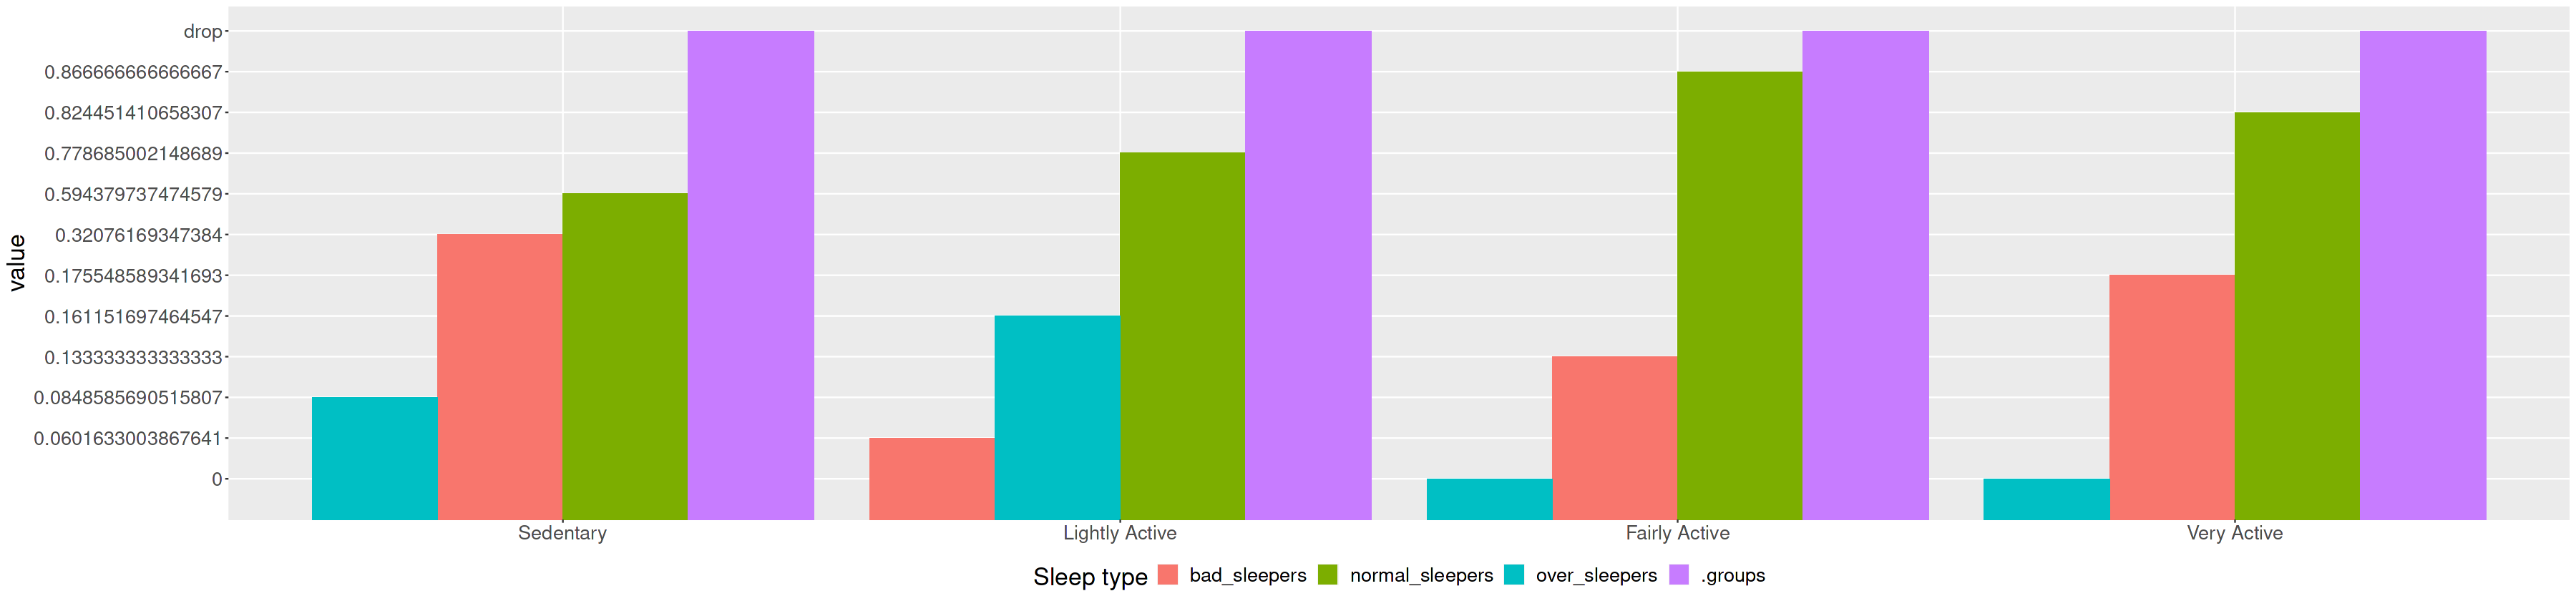

In [14]:
# Now we can plot the data for each user type:
sleepType_by_userType_melted <- melt(sleepType_by_userType, id.vars = "user_type")

ggplot(sleepType_by_userType_melted, aes(user_type, value, fill = variable)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(x = NULL, fill = "Sleep type") + 
  theme(legend.position = "bottom", text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

**Analysis:¶**

* I like this chart a lot, because it shows very clearly the relation between the activity level and sleep quality as in the sedentary users we find the largest percentage of bad sleepers and with some activity (even very little activity) we see a great increase of normal sleepers.

* The most unexpected result for me was the decrease of over sleepers (more than 8h) in the most active categories which makes sense given the fact that they are people that dont like sticking around in bed for a long time...

# PHASE 5 : Share¶
**Key objectives:**

1.Share my conclusions.:

* There are some interesting insights I found in this data that I think would be interesting when better targeting the marketing messages to new customers:

1) There is a clear relation between higher intensity activity and calories burned so logging the activity with the device could be a good motivator to increase your activity if you have some kind of plan to lose weight.

2) The data also shows a clear trend of better quality sleep linked to the activity level that would be interesting to improve your sleep and in general to low stress and improving your quality of life.

* With all this in mind I would suggest focusing the marketing messages on the improving sleep and lowering stress and on the fitness/losing weight aspects of the devices as using this device to track your sleep and activity will encourage the user to increase their activities seeing the improvement in their metrics.

# Thanks for reading and I hope you like it!